In [1]:
# amacode:
import os
os.environ["OMP_NUM_THREADS"] = '1'

import warnings
# Suppress FutureWarning messages#
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# DB imports
import sqlite3
from pathlib import Path

# Data and ML imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

## Fetch the data from SQLite

In [4]:
# Create path to SQLite DB
db = Path('../Data_Handling/Outputs/cars_sold.sqlite')

# Connect to DB
conn = sqlite3.connect(db)

# Query the DB
query = 'SELECT * FROM cars_sold'

# Create a df from the Query
df = pd.read_sql_query(query, conn)
df.head()

# Close the connection
conn.close()

In [5]:
df.head()

,make,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Audi,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,Audi,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,Audi,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,Audi,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,Audi,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


## Get Features and Target variables

In [5]:
# Create the features set
X = df.copy()

X.drop("price", axis=1, inplace=True)
X.head()

,make,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
index,,,,,,,,,
0,Audi,A1,2017,Manual,15735,Petrol,150,55.4,1.4
1,Audi,A6,2016,Automatic,36203,Diesel,20,64.2,2.0
2,Audi,A1,2016,Manual,29946,Petrol,30,55.4,1.4
3,Audi,A4,2017,Automatic,25952,Diesel,145,67.3,2.0
4,Audi,A3,2019,Manual,1998,Petrol,145,49.6,1.0


In [6]:
X = pd.get_dummies(X, dtype=int)

X.head()

,year,mileage,tax,mpg,engineSize,make_Audi,make_Bmw,make_Ford,make_Hyundai,make_Mercedes,...,model_230,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
index,,,,,,,,,,,,,,,,,,,,,
0,2017,15735,150,55.4,1.4,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,2016,36203,20,64.2,2.0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,2016,29946,30,55.4,1.4,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,2017,25952,145,67.3,2.0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4,2019,1998,145,49.6,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [7]:
y = df['price'] #.values.reshape(-1,1)
y[:5]

index
0    12500
1    16500
2    11000
3    16800
4    17300
Name: price, dtype: int64

## Split and Scale the Data

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [9]:
# Create StandardScaler instance
scaler = StandardScaler()

In [10]:
# Fit the scaler
X_scaler = scaler.fit(X_train)

In [11]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Fitting the Decision Tree

In [12]:
# Creating the decision tree regressor instance
model = DecisionTreeRegressor(max_depth=15, random_state=0)

In [13]:
# Fitting the model
model = model.fit(X_train_scaled, y_train)

## Making Predictions Using the Model

In [14]:
# Making predictions using the testing data
y_pred = model.predict(X_test_scaled)

## Model Evaluation

In [23]:
# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Decision Tree Model - Evaluation")
print("-" * 20)
print(f"Mean Squared Error: {mse:.2f}")
print("-" * 20)
print(f"R-squared (R2): {r2}")

Decision Tree Model - Evaluation
--------------------
Mean Squared Error: 6128960.49
--------------------
R-squared (R2): 0.9333372257166274


## Visualize the Decision Tree Model and Predictions

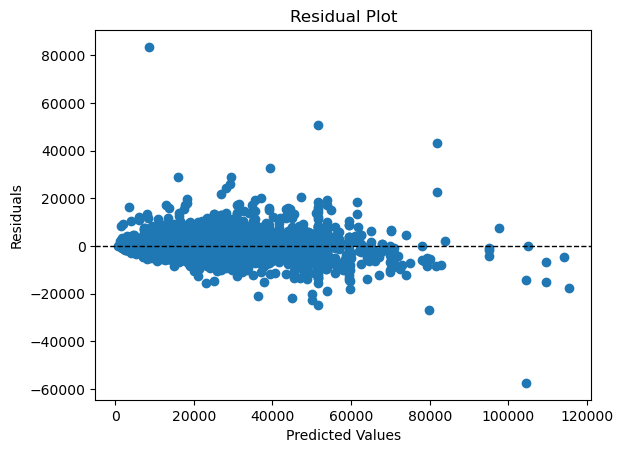

In [18]:
# Plot of the Residual values from y_test and y_pred

residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.title("Residual Plot")
plt.show()

#### Residuals Plot Analysis
From the residuals plot, we can see that the Decision tree model consistently predicted values around the actual value. There are clearly some outliers which may have occurred due to the limited detail within the dataset compared to what actually drives Used Car Sales within the UK.

We can also see that as the predicted value increases, residual values increase. Although something to look at, these occurrences are relatively low compared to the number of test values.

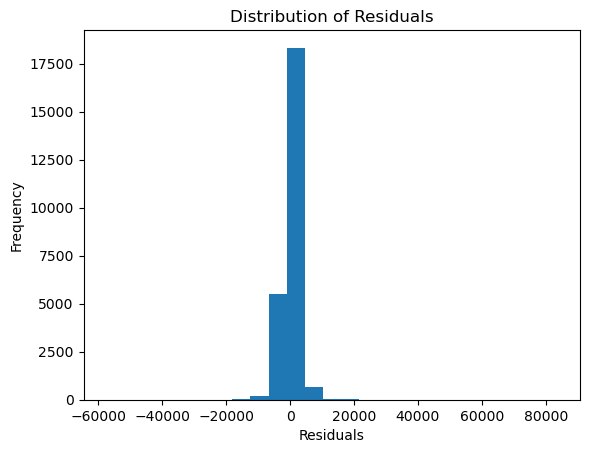

In [19]:
# Distribution of Residuals

plt.hist(residuals, bins=25)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()

### Distribution of Residuals Analysis
The distribution of residuals shows a peak in the distribution at the `0` mark. Although very slightly skewed to the right, this shows the model is well-fitted.

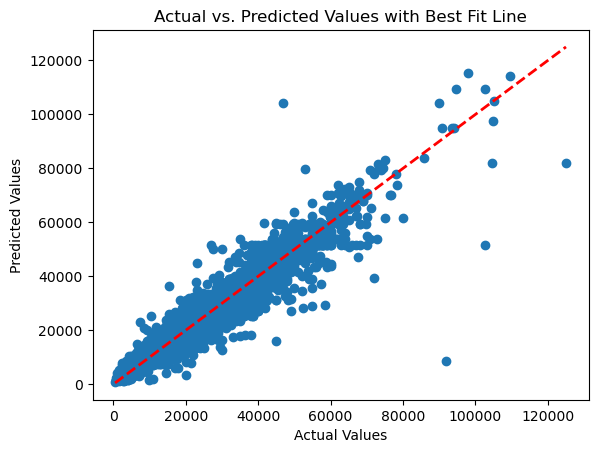

In [20]:
# Actual vs Predicted Values with a Best Fit Line

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values with Best Fit Line")
plt.show()

### Actual vs Predicted with Best Fit Line
This visualization shows a positive correlation between the Actual Values and the Model's predicted values. There's a high concentration around the Best Fit Line which shows a good accuracy from the model.

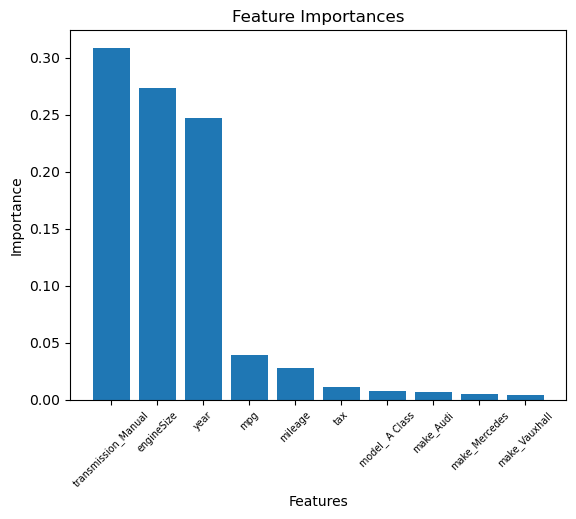

In [21]:
# Top 10 Feature importance
feat_imp = sorted(zip(model.feature_importances_, X.columns), reverse=True)

values, labels = zip(*feat_imp[:10])

plt.bar(labels, values)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importances")
plt.xticks(rotation=45, size='x-small')
plt.show()

### Feature Importance Analysis
The feature importance is good to compare to the Random Forest Model to establish if they both value the same top 10 features. We can see that the `transmission_Manual`, `engineSize` and `year` drove the model's predictions most, closely followed by `mpg`, `mileage` and `tax`. These features are typically what we would of expected to have the biggest influence on the price of a car.